### Simple linear regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


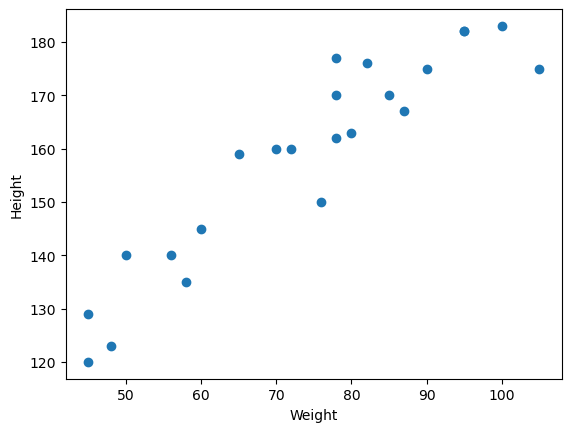

In [5]:
##scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [6]:
## Correalation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


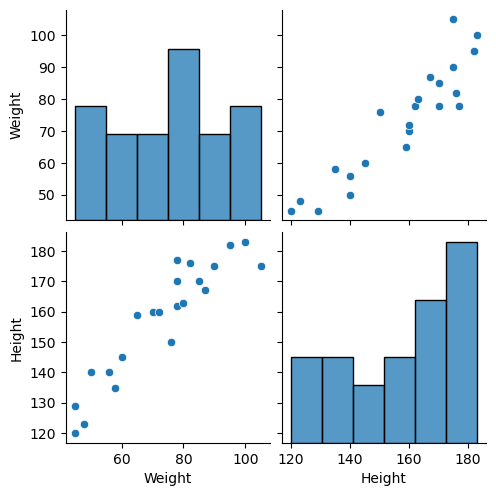

In [7]:
##Seaborn for Visulaitzation
import seaborn as sns
sns.pairplot(df)
plt.show()

In [8]:
## Indepedent and dependent features
X= df[['Weight']]  ## indenependent feature should be data frame or 2D array
Y = df['Height'] ## this variable is in series or 1d array  
 

In [9]:
## Train  test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [10]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [11]:
X_train.shape

(17, 1)

In [12]:
## Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)


In [13]:
X_test=scaler.transform(X_test)

In [14]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [15]:
## Apply simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs = -1)

In [16]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [17]:
## this is Beta 1
print("Coffecient or Slope: ", regression.coef_)
## this is Beta 0
print("Intercept:" , regression.intercept_)

Coffecient or Slope:  [17.2982057]
Intercept: 156.47058823529412


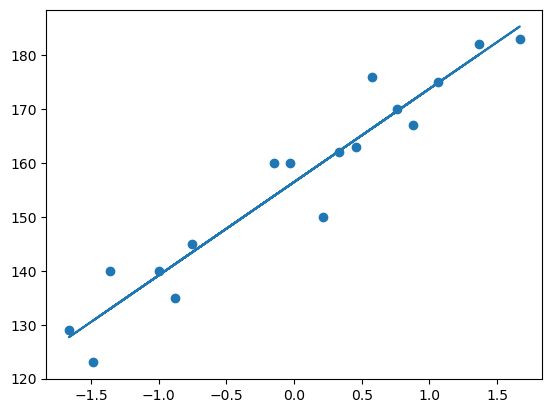

In [18]:
## Plot Training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

### prediction of the test data
1. predict height output = intercfept + coef_(Weights)
2. y_pred_test = 156.470 + 17.29(X_test)

In [19]:
## prediction for th test data
Y_pred = regression.predict(X_test)

In [20]:
### Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


### R Square
Fromlua

**R^2 = 1-SSR/SST**

R^2 = coefficient of determination 
SSR=sumof residuals 
SST=total sum of squares

In [21]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print(score)

0.7360826717981276


### Adjusted R2



**Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]**



where: 
R2:The R2 of model 
n:The number of observation 
k:the number of predictor variable

In [22]:
## display the adjusyed R-Squared
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6701033397476595

In [23]:
## OLS Linear Regression
import statsmodels.api as sm

model= sm.OLS(Y_train,X_train).fit()

In [24]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [25]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 18 Jun 2025   Prob (F-statistic):                       0.664
Time:                        09:46:20   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\utkar\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\utkar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

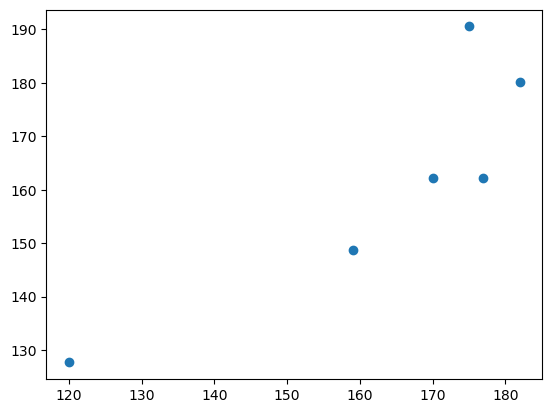

In [27]:
## PLot a Scatter Plot for the prediction
plt.scatter(Y_test,Y_pred)
plt.show()

In [28]:
## Rediduals
residuals = Y_test - Y_pred
residuals

15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64

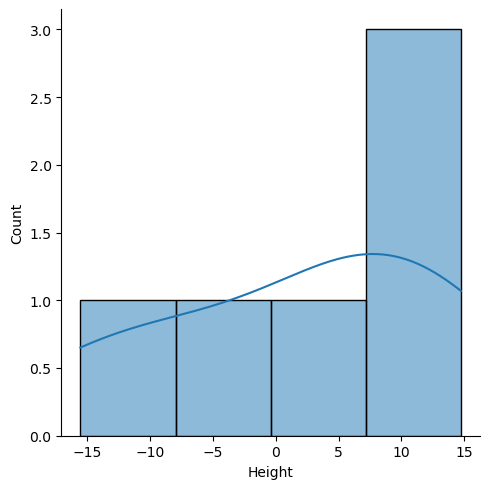

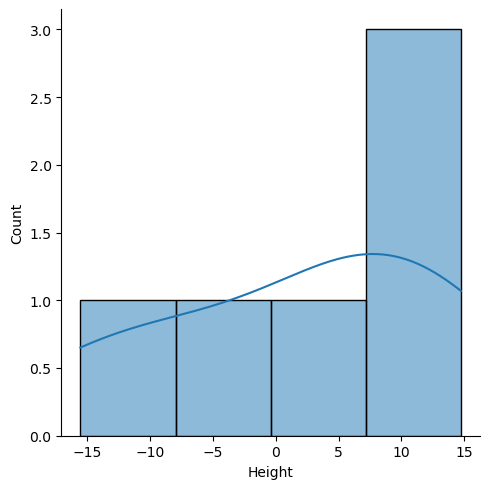

In [30]:
## PLot the residuals
import seaborn as sns
sns.displot(residuals,kde=True)
plt.show()